## Knock Airport Weather

Data link for Knock Airport Weather CSV. https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

Import Libraries

In [10]:
# Python libraries

import pandas as pd # for data manipulation and analysis.
import datetime
import numpy as np # for numerical operations on arrays.
import seaborn as sns # for plotting charts

Loading Data

In [11]:
# Load data and skip the first 23 rows.
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23, low_memory=False)
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


Cleaning Data

In [12]:
# Assign blank cells(" ") to NAN values.
df.replace(r"^\s*$", np.nan, regex=True, inplace=True)

In [13]:
# Check for missing data.
print(df.isna().sum())

date         0
ind          0
rain        49
ind.1        0
temp         0
ind.2        0
wetb         0
dewpt        0
vappr        0
rhum         0
msl         18
ind.3        0
wdsp        50
ind.4        0
wddir       52
ww       55079
w        55080
sun          0
vis      62174
clht        18
clamt       18
dtype: int64


Dropping NULL values.

In [14]:
# Drop null values.
df.dropna(inplace = True)


In [15]:
# Check if data is clean.
print(df.isna().sum())

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64


Changing 'date' column to 'datetime' type.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas-to-datetime

In [16]:
pd.to_datetime(df['date']).dt.strftime('%Y-%m-%dT%H:%M:%S')
df['date'] = pd.to_datetime(df['date'])
df['date']

C:\Users\phumi\AppData\Local\Temp\ipykernel_14172\4117001753.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(df['date']).dt.strftime('%Y-%m-%dT%H:%M:%S')
C:\Users\phumi\AppData\Local\Temp\ipykernel_14172\4117001753.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
247662   2024-10-31 13:00:00
247663   2024-10-31 14:00:00
247664   2024-10-31 15:00:00
247665   2024-10-31 16:00:00
247666   2024-10-31 17:00:00
Name: date, Length: 185424, dtype: datetime64[ns]

Setting the index to the datetime.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html#pandas-datetimeindex

In [17]:
df.set_index('date', inplace=True)
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7


Checking column type

In [18]:
df.dtypes

ind        int64
rain      object
ind.1      int64
temp     float64
ind.2      int64
wetb     float64
dewpt    float64
vappr    float64
rhum       int64
msl       object
ind.3      int64
wdsp      object
ind.4      int64
wddir     object
ww        object
w         object
sun      float64
vis       object
clht      object
clamt     object
dtype: object

Plotting using seaborn.

https://seaborn.pydata.org/tutorial/function_overview.html#overview-of-seaborn-plotting-functions


<Axes: xlabel='date', ylabel='temp'>

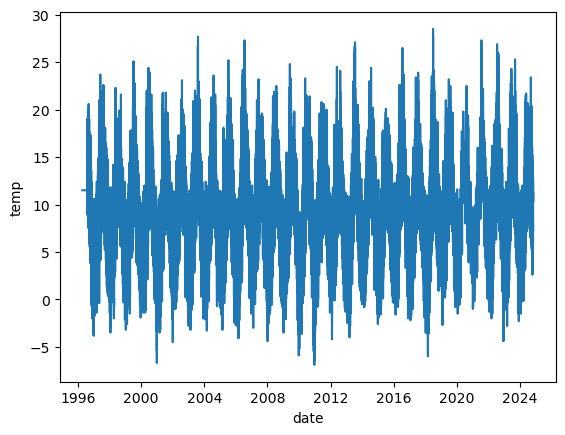

In [19]:
# Temperature over the years
sns.lineplot(data=df, x='date', y='temp')

Mean Temperature

In [20]:
# Calculating overall mean temp

dateFrom = "1996-04-10 14:00:00"
dateTo = "2024-11-01 00:00:00"
df.loc[dateFrom:dateTo]['temp'].mean()

9.039584951246873

Calculating Daily Mean Temperature

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html#pandas-series-resample

In [21]:
# Calculate daily mean temperature.
daily_avtemp =  df["temp"].resample("D").mean

Adding a new column ('daily_avtemp').

In [22]:
# Create 'daily_avtemp' column
df['daily_avtemp'] = df["temp"].resample("D").mean()
df['daily_avtemp']

date
1996-04-10 14:00:00   NaN
1996-07-31 08:00:00   NaN
1996-07-31 09:00:00   NaN
1996-07-31 10:00:00   NaN
1996-07-31 11:00:00   NaN
                       ..
2024-10-31 13:00:00   NaN
2024-10-31 14:00:00   NaN
2024-10-31 15:00:00   NaN
2024-10-31 16:00:00   NaN
2024-10-31 17:00:00   NaN
Name: daily_avtemp, Length: 185424, dtype: float64

Cleaning Data

In [23]:
# Drop null values.

df.dropna(inplace = True)
df.head(3)


,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,...,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,daily_avtemp
date,,,,,,,,,,,,,,,,,,,,,
1996-08-01,0,0.0,0,9.7,0,9.0,8.3,0.0,0,1011.4,...,0,0,0,1,81,0.0,35000,999,3,11.704348
1996-08-02,0,0.0,0,10.3,0,9.6,8.9,11.4,91,1020.7,...,4,2,260,1,82,0.0,35000,30,6,12.504167
1996-08-03,0,0.0,0,12.1,0,11.7,11.3,13.4,95,1028.6,...,5,2,230,2,11,4.9,40000,39,7,14.266667


Daily mean temperature plot.

<Axes: xlabel='date', ylabel='daily_avtemp'>

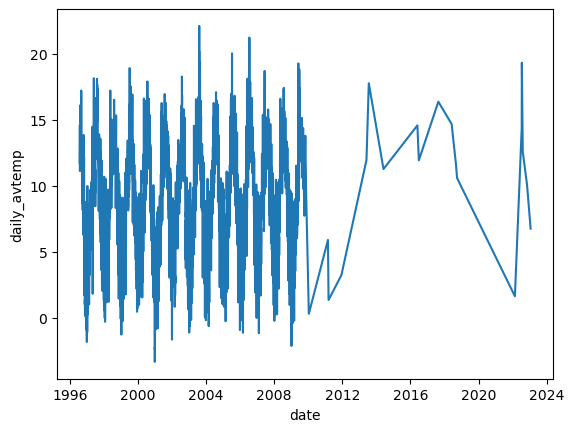

In [24]:
# Plot
sns.lineplot(data=df, x='date', y='daily_avtemp')


Monthly Mean Temperature

In [25]:
# Calculate monthly mean temperature
monthly_avtemp = df["temp"].resample("ME").mean()

Adding a new ('monthly_avtemp') column.

In [26]:
#Create 'monthly_av' column
df['monthly_avtemp'] = df["temp"].resample("ME").mean()
df['monthly_avtemp']

date
1996-08-01   NaN
1996-08-02   NaN
1996-08-03   NaN
1996-08-04   NaN
1996-08-05   NaN
              ..
2022-07-14   NaN
2022-07-17   NaN
2022-08-05   NaN
2022-11-05   NaN
2023-01-21   NaN
Name: monthly_avtemp, Length: 4843, dtype: float64

Cleaning data.

In [27]:
# Dropping null values.
df.dropna(inplace = True)
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,...,ind.4,wddir,ww,w,sun,vis,clht,clamt,daily_avtemp,monthly_avtemp
date,,,,,,,,,,,,,,,,,,,,,
1996-08-31,0,0.0,0,8.2,0,7.9,7.6,10.4,96,1030.5,...,2,270,2,11,4.9,50000,999,1,11.258333,11.65000
1996-09-30,0,0.0,0,8.2,0,7.6,6.9,10.0,92,1007.9,...,2,240,2,81,0.0,40000,50,5,8.795833,10.56000
1996-10-31,0,1.9,0,9.0,0,9.0,9.0,11.5,100,1007.9,...,2,160,61,62,0.0,2400,2,8,10.050000,9.52963


Monthly mean temperature plot.

<Axes: xlabel='date', ylabel='monthly_avtemp'>

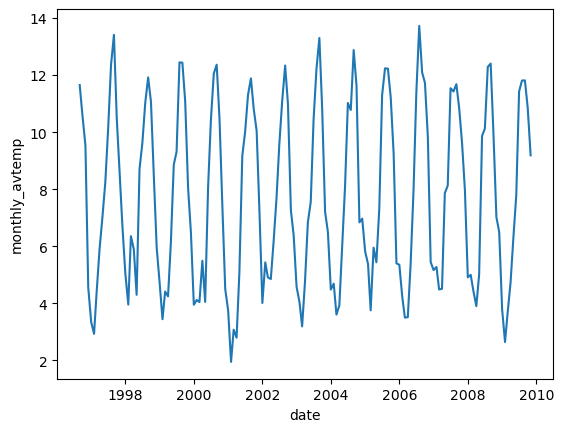

In [28]:
# Plot
sns.lineplot(data=df, x='date', y='monthly_avtemp')

#### The Windspeed

Converting windspeed to floats.

In [29]:
# Convert windspeed to floats
df['wdsp'] = df['wdsp'].astype(float)

Calculate average windspeed

In [30]:
# Yearly average
y_avesp =  df['wdsp'].resample('YE').mean()

Adding 'yearly average' windspeed column.

In [31]:
# Create 'y_ave' column
df['y_avesp'] = df['wdsp'].resample('YE').mean()
df['y_avesp']


date
1996-08-31     NaN
1996-09-30     NaN
1996-10-31     NaN
1996-11-30     NaN
1996-12-31    13.2
              ... 
2009-06-30     NaN
2009-07-31     NaN
2009-08-31     NaN
2009-09-30     NaN
2009-10-31     NaN
Name: y_avesp, Length: 159, dtype: float64

Cleaning data.

In [32]:
# Drop null values.

df.dropna(inplace = True)
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,...,wddir,ww,w,sun,vis,clht,clamt,daily_avtemp,monthly_avtemp,y_avesp
date,,,,,,,,,,,,,,,,,,,,,
1996-12-31,0,0.0,1,-0.2,1,-1.4,-4.0,4.6,76,1024.3,...,50,2,11,4.9,40000,50,5,-1.504167,3.353333,13.200000
1997-12-31,0,0.2,0,4.1,0,3.5,2.6,7.4,90,986.0,...,290,21,62,0.0,25000,28,8,1.320833,5.032258,8.083333
1998-12-31,0,0.0,0,4.0,0,3.1,1.7,6.9,85,986.2,...,130,2,11,0.0,30000,35,6,3.945833,4.729032,9.500000


<Axes: xlabel='date', ylabel='y_avesp'>

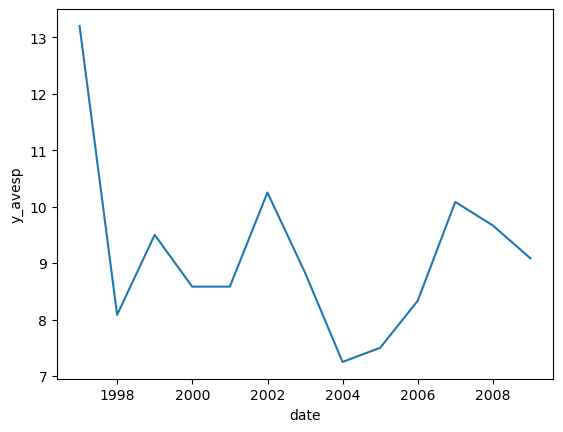

In [33]:
# Plot
sns.lineplot(data=df, x='date', y='y_avesp')

Daily Maximum windspeed.

In [34]:
# Calculate maximum daily windspeed
daily_maxspeed =  df['wdsp'].resample('D').max()

Add 'daily_maxspeed' column.

In [35]:
# Create 'daily_max' column
df['daily_maxspeed'] = df["wdsp"].resample("D").max()
df['daily_maxspeed']

date
1996-12-31     9.0
1997-12-31    13.0
1998-12-31    21.0
1999-12-31     8.0
2000-12-31     6.0
2001-12-31     3.0
2002-12-31     8.0
2003-12-31     6.0
2004-12-31     4.0
2005-12-31    14.0
2006-12-31    10.0
2007-12-31    15.0
2008-12-31    11.0
Name: daily_maxspeed, dtype: float64

In [36]:
# check for missing data.
#print(df['daily_maxspeed'].isnull())

<Axes: xlabel='date', ylabel='daily_maxspeed'>

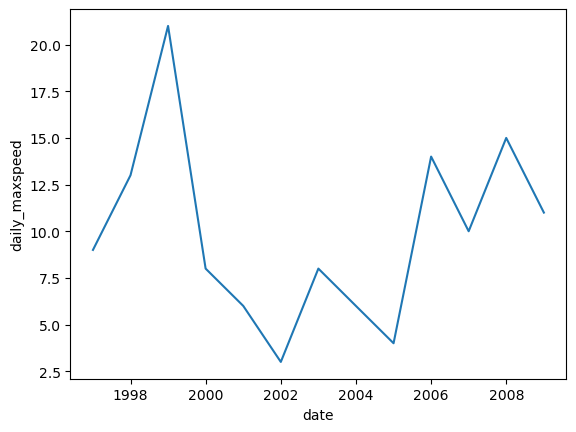

In [37]:
# Plot
sns.lineplot(data=df, x='date', y='daily_maxspeed')

Monthly Mean for daily maximum windspeed.

In [38]:
# Calculate mean of daily maximun speed
monthly_av_maxspeed = df['daily_maxspeed'].resample('ME').mean()

Adding 'monthly_av_maxspeed' column

In [39]:
#Create 'monthly_maxspeed' column
df['monthly_av_maxspeed'] = df["daily_maxspeed"].resample("ME").mean()
df['monthly_av_maxspeed']

date
1996-12-31     9.0
1997-12-31    13.0
1998-12-31    21.0
1999-12-31     8.0
2000-12-31     6.0
2001-12-31     3.0
2002-12-31     8.0
2003-12-31     6.0
2004-12-31     4.0
2005-12-31    14.0
2006-12-31    10.0
2007-12-31    15.0
2008-12-31    11.0
Name: monthly_av_maxspeed, dtype: float64

<Axes: xlabel='date', ylabel='monthly_av_maxspeed'>

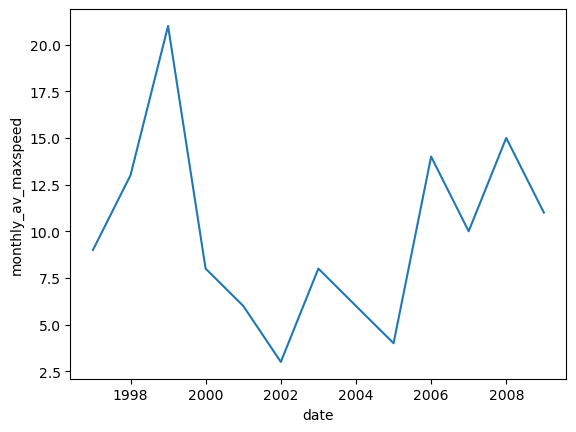

In [40]:
#Plot
sns.lineplot(data=df, x='date', y='monthly_av_maxspeed')